### FASHION MNIST CNN ANALYSIS

* Label Description 
* 0 T-shirt/top 
* 1 Trouser 
* 2 Pullover 
* 3 Dress 
* 4 Coat 
* 5 Sandal 
* 6 Shirt 
* 7 Sneaker 
* 8 Bag 
* 9 Ankle boot

Each gray-scale image is 28x28

* Each image is of 28x28 Matrix
* Each image is gray - scale
* 2 Dimentional Marixes of image

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'1.13.1'

In [23]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [24]:
# 28x28 - Image shape matrix of MNIST DataSet
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [25]:
print(x_train)
print(y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[9 0 0 ... 3 0 5]


In [26]:
x_train[[0]]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

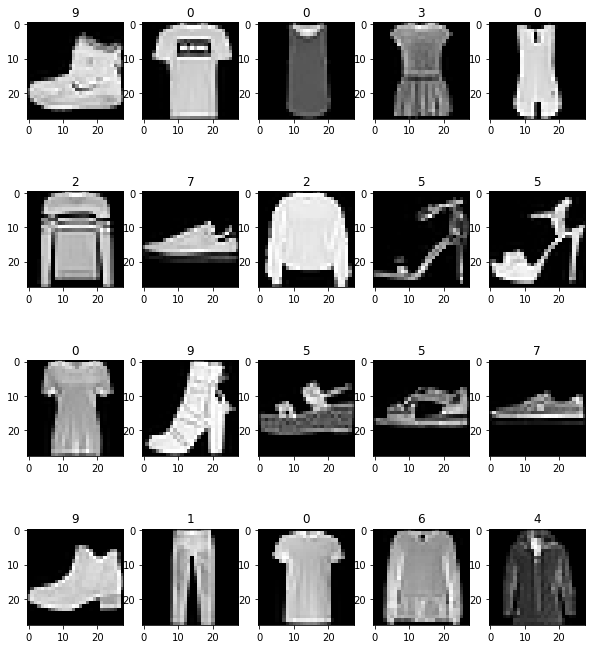

In [27]:
# To change the shape of figure
plt.figure(figsize=(10,15))
# i is index of images
for i in range(0,20):
    # 5 Row & 5 Column
    # Plt.subplot split one plot into small plots 
    plt.subplot(5,5, i+1)
    #imshow() it is used with plt.subplot()
    # input x_train 28X28 image of 2D
    plt.imshow(x_train[i], cmap = plt.cm.gray)
    plt.title((y_train[i]))

y = 0 T-shirt/top


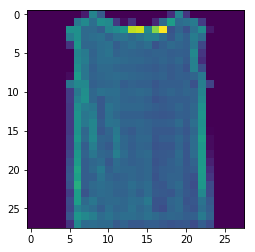

In [28]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
# Image index, you can pick any number between 0 and 59,999 -60,000
img_index = 700
# y_train contains the lables, ranging from 0 to 9
# y_train[0]
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " + 
       (fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Preprocessing Image

In [29]:
#Data normalization
#Normalize the data dimensions so that they are of approximately 
# the same scale. 0-255
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Splitting data into X_train & X_validation
Y_train & Y_validation

In [30]:
#Split the training data into training and testing sets 
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

### Preprocessing

In [31]:
# Reshape input data from (28, 28) array to (28, 28, 1) matrix
# reshape() is to reshape array or matrix
# new reshape data will be 784x1
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

In [32]:
print(x_train[[0]])

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.00392157]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.17254902]
   [0.49803922]
   [0.7137255 ]
   [0.7254902 ]
   [0.6313726 ]
   [0.47058824]
   [0.21568628]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

In [33]:
# One-hot encode the labels
# Apply only over categorical data
# 10 are number of categories of fashion 
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_test.shape

(10000, 10)

In [34]:
# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Model-Sequential 

In [35]:
model = tf.keras.Sequential()

### Convolution Neural Network -
Filter - 8x8 = 64(Matrix Shape) ,Kernal - Stride = 2 , activation - ReLU, Padding - Drop the not selected matrix

In [36]:
# Must define the input shape in the first layer of the neural network
# 
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, 
                                 padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

### Fully Connected Layer

In [37]:
# Flatten the pixel matrix into feature matrix
model.add(tf.keras.layers.Flatten())
# Input Layer - 16X16
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
#Output Layer (Class/Category) - 10
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3211520   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total para

In [38]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [39]:
#from keras.callbacks import ModelCheckpoint
#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
55000/55000 [==============================] - 88s 2ms/sample - loss: 0.4613 - acc: 0.8358 - val_loss: 0.3180 - val_acc: 0.8854
Epoch 2/10
55000/55000 [==============================] - 86s 2ms/sample - loss: 0.3207 - acc: 0.8837 - val_loss: 0.2683 - val_acc: 0.9030
Epoch 3/10
55000/55000 [==============================] - 84s 2ms/sample - loss: 0.2844 - acc: 0.8952 - val_loss: 0.2582 - val_acc: 0.9088
Epoch 4/10
55000/55000 [==============================] - 85s 2ms/sample - loss: 0.2628 - acc: 0.9032 - val_loss: 0.2608 - val_acc: 0.9064
Epoch 5/10
55000/55000 [==============================] - 95s 2ms/sample - loss: 0.2438 - acc: 0.9114 - val_loss: 0.2442 - val_acc: 0.9108
Epoch 6/10
55000/55000 [==============================] - 93s 2ms/sample - loss: 0.2299 - acc: 0.9139 - val_loss: 0.2402 - val_acc: 0.9126
Epoch 7/10
55000/55000 [==============================] - 95s 2ms/sam

In [22]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
y_hat = model.predict(x_test)

10000/10000 [==============================] - 4s 407us/sample - loss: 0.2513 - acc: 0.9068

 Test accuracy: 0.9068


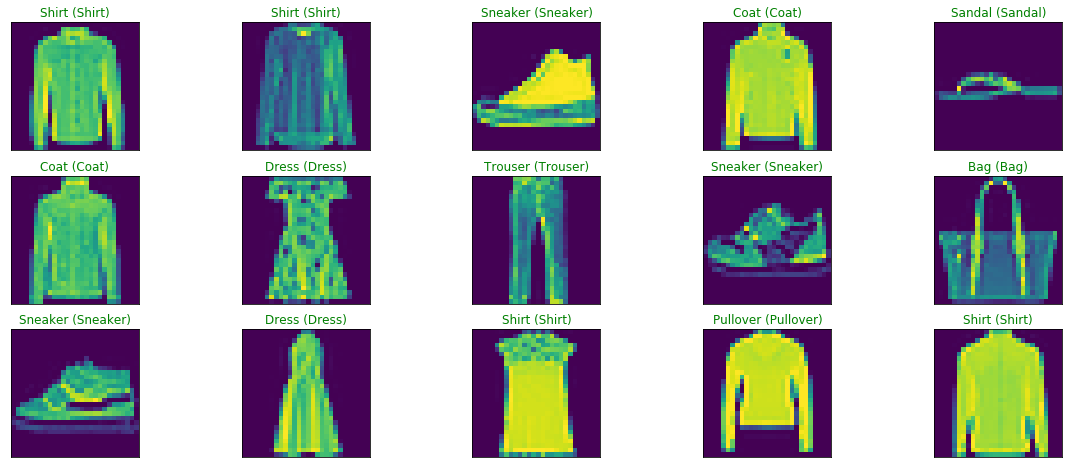

In [24]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], 
                                        size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i+ 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))